# Prediction Using Supervised Machine Learning



# Submitted By:- Priyadarshini PAL


# Objective:-Predict the percentage of student based on number of study hours using simple Linear regression

# Step 1: To install all the required libraries

In [1]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
pip install matplotlib

You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install sqrt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sqrt (from versions: none)
ERROR: No matching distribution found for sqrt
You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
pip install cov

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cov (from versions: none)
ERROR: No matching distribution found for cov
You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [69]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Python\Python310\python.exe -m pip install --upgrade pip' command.


# Step2: Import all the required Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import numpy as np
from math import sqrt

# Step3: Read the data

In [7]:
df=pd.read_csv("C:/Users/Dell/Desktop/sparkstudent.csv")
 #displaying the top 20 values in the dataset
df.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
#For any 5 sample from data
df.sample(5)

,Hours,Scores
9,2.7,25
22,3.8,35
16,2.5,30
10,7.7,85
12,4.5,41


# Step4: Get the data knowledge 

In [9]:
# For the Number of rows and columns in the dataset
df.shape

(25, 2)

In [10]:
# Data overall description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#Checking whether there are any missing values in our data
df.isna().sum()

Hours     0
Scores    0
dtype: int64

# Step5: Analyzing the data fro better predition

In [12]:
#for analyzing the scores with increasing noumber of study hours
df.groupby(['Hours']).mean()

,Scores
Hours,
1.1,17.0
1.5,20.0
1.9,24.0
2.5,25.5
2.7,27.5
3.2,27.0
3.3,42.0
3.5,30.0
3.8,35.0


In [13]:
#for analyzing the hours with increasing noumber of scores
df.groupby(['Scores']).mean()

,Hours
Scores,
17,1.1
20,1.5
21,2.5
24,1.9
25,2.7
27,3.2
30,2.9
35,3.8
41,4.5


# Step 6: Visualizing the given Data

Text(0, 0.5, 'Frequency ')

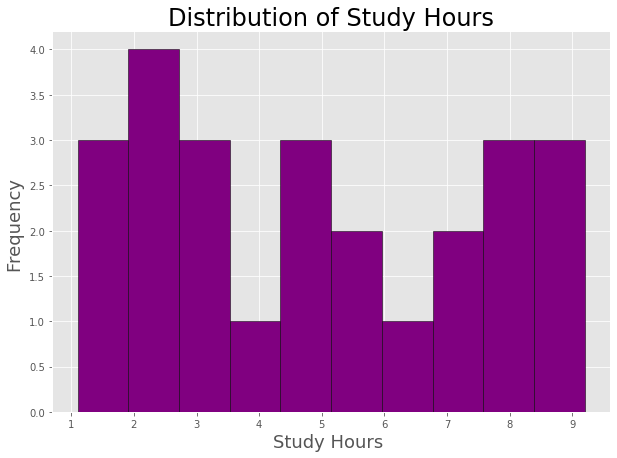

In [14]:
#Histogram of Hours
plt.style.use('ggplot')

df.Hours.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Study Hours', size=24)
plt.xlabel('Study Hours ', size=18)
plt.ylabel('Frequency ', size=18)


Text(0, 0.5, 'Frequency ')

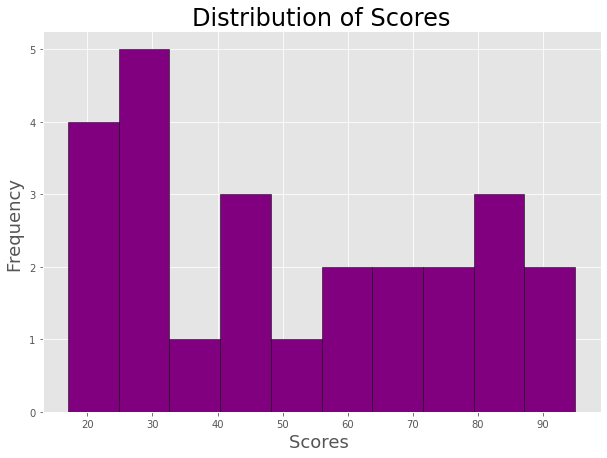

In [15]:
#Histogram of Scores
plt.style.use('ggplot')

df.Scores.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Scores', size=24)
plt.xlabel('Scores ', size=18)
plt.ylabel('Frequency ', size=18)

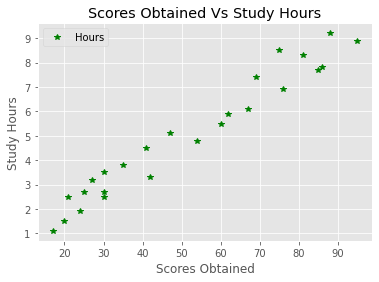

In [16]:
df.plot(x='Scores',y='Hours', style='*', color="g")
plt.xlabel("Scores Obtained")
plt.ylabel("Study Hours")
plt.title("Scores Obtained Vs Study Hours")
plt.show()

# Step7:Split the Dataset into Training Set and Testing Set for Prediction

In [17]:
hour=df.iloc[:, :1].values # for array of only Hours
score=df.iloc[:, 1:].values # for array of only Scores

In [18]:
hour

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [19]:
score

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(hour,score,train_size=0.70,test_size=0.30, random_state=0)

In [52]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(x_train,y_train)
y_predict=model.predict(x_train)

# Step8: Plotting Simple Linaer Regression Line with the given data

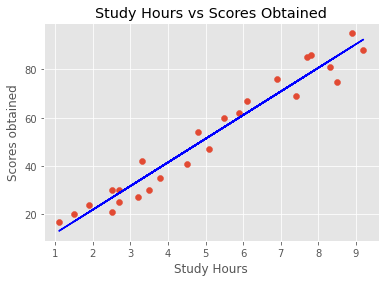

In [53]:
line= model.coef_*hour + model.intercept_
plt.scatter(hour,score)
plt.plot(hour,line,color='b')
plt.xlabel("Study Hours")
plt.ylabel("Scores obtained")
plt.title("Study Hours vs Scores Obtained")
plt.show()

# Step9: Prediction of Scores based on Study hours

In [56]:
y_predict= model.predict(x_test)
y_predict

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [57]:
#Actual values 
print("Actual values: ")
y_test


Actual values: 


array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]], dtype=int64)

In [58]:
# predicted values 
print("Prediction values: ")
y_predict

Prediction values: 


array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [59]:
#Comparing actual and predicted values
df1= pd.DataFrame({'Actual':[y_test],'Predicted':[y_predict]})
df1

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.05366541246545], [33.69422877993883], [74..."


In [60]:
# Prediction of scores for 9.25 hours
print("Score of a student for 9.25 study hours is ",model.predict([[9.25]]))

Score of a student for 9.25 study hours is  [[92.91505723]]


# Step10: Accuracy of the Model

In [61]:
absolute_error=metrics.mean_absolute_error(y_test,y_predict)
MeanSq_error=metrics.mean_squared_error(y_test,y_predict)
print("Mean Squared Error for the Model: ",MeanSq_error )
print("Mean Absolute Error for the Model: ",absolute_error )


Mean Squared Error for the Model:  22.96509721270043
Mean Absolute Error for the Model:  4.419727808027652


In [62]:
rms = sqrt(mean_squared_error(y_test,y_predict))
print(rms)

4.792191274636315


In [76]:
np.cov(df)

array([[ 171.125,  387.575,  220.15 ,  615.125,  245.125,  171.125,
         728.9  ,  504.125,  672.475,  206.275,  715.025,  518.925,
         337.625,  357.975,  147.075,  796.425,  254.375,  204.425,
         563.325,  569.8  ,  252.525,  455.1  ,  288.6  ,  639.175,
         723.35 ],
       [ 387.575,  877.805,  498.61 , 1393.175,  555.175,  387.575,
        1650.86 , 1141.775, 1523.065,  467.185, 1619.435, 1175.295,
         764.675,  810.765,  333.105, 1803.795,  576.125,  462.995,
        1275.855, 1290.52 ,  571.935, 1030.74 ,  653.64 , 1447.645,
        1638.29 ],
       [ 220.15 ,  498.61 ,  283.22 ,  791.35 ,  315.35 ,  220.15 ,
         937.72 ,  648.55 ,  865.13 ,  265.37 ,  919.87 ,  667.59 ,
         434.35 ,  460.53 ,  189.21 , 1024.59 ,  327.25 ,  262.99 ,
         724.71 ,  733.04 ,  324.87 ,  585.48 ,  371.28 ,  822.29 ,
         930.58 ],
       [ 615.125, 1393.175,  791.35 , 2211.125,  881.125,  615.125,
        2620.1  , 1812.125, 2417.275,  741.475, 2570.225, 1

In [67]:

regr = linear_model.LinearRegression()
regr.fit(hour, score)

print(regr.coef_)

[[9.77580339]]
